In [162]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers as mh

In [163]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [164]:
s_d = mh.slant_depths
angles = mh.angles

In [165]:
nucleus= ""
pi_mod = "15" # factor just as numbers

yields_jan_mod = "yields_jan_p" + pi_mod + nucleus
yields_apr_mod = "yields_apr_p" + pi_mod + nucleus
yields_jul_mod = "yields_jul_p" + pi_mod+ nucleus

jan_mod = "jan_p" + pi_mod+ nucleus
jul_mod = "jul_p" + pi_mod+ nucleus

if pi_mod == "15":
    cs = '1.5'
elif pi_mod == "05":
    cs = '0.5'

# make unmodified label including option to add iron

yields_jan = "yields_jan" + nucleus
yields_apr = "yields_apr" + nucleus
yields_jul = "yields_jul" + nucleus

jan = "jan" + nucleus
jul = "jul" + nucleus

In [166]:
d = 3.5

In [167]:
x_mod = d/np.cos(np.deg2rad(angles))

In [168]:
x_mod

array([4.375     , 3.88888889, 3.5       ])

In [169]:
cmap = plt.cm.magma

# Choose 3 colors, avoiding the light yellow range by limiting the upper value
n_colors = len(x_mod)
values = np.linspace(0, 0.8, n_colors)  # Avoid the range near 1.0

# Generate colors from the adjusted colormap range
colors = [cmap(value) for value in values]


<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3569496/1526694728.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$, detector depth = ' +str(d) + 'km')


36.86989764584401
25.841932763167126
0.0


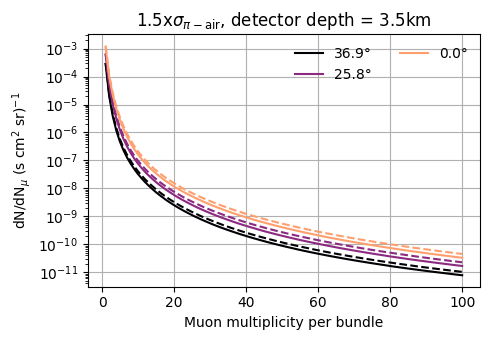

In [170]:
plt.figure(figsize=(5.0, 3.5))
lines=[]
angle = 0.0
for i, X in enumerate(x_mod):
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jan,
            norm=False,
        )
        / mh.rates(X, angle, jan),
        c=colors[i],
        label=r"{0:1.1f}°".format(np.rad2deg(np.arccos(d/X))),
    )[0]
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jan_mod,
            norm=False,
        )
        / mh.rates(X, angle, jan_mod),
        c=colors[i],
        ls='--',
    )[0]
    print(np.rad2deg(np.arccos(d/X)))
    
plt.xlabel("Muon multiplicity per bundle")
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$, detector depth = ' +str(d) + 'km')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="jan"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multiperbundle_zenith' + str(d) + 'km_jan_csp' + cs + nucleus+  '.png')

<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3569496/1392612413.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$, detector depth = ' +str(d) + 'km')


36.86989764584401
25.841932763167126
0.0


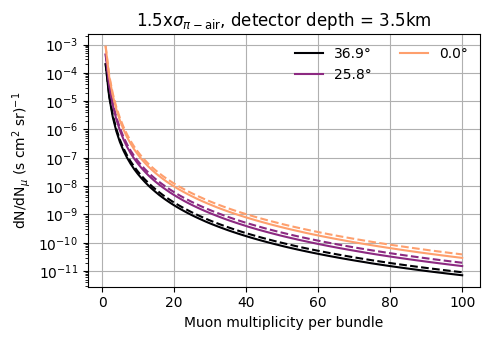

In [171]:
plt.figure(figsize=(5.0, 3.5))
lines=[]
angle = 0.0
for i, X in enumerate(x_mod):
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jul,
            norm=False,
        )
        / mh.rates(X, angle, jul),
        c=colors[i],
        label=r"{0:1.1f}°".format(np.rad2deg(np.arccos(d/X))),
    )[0]
    plt.semilogy(
        mh.n_mu_vec,
        1e4
        * mh.mult_dist(
            X,
            0.0,
            pm.GlobalSplineFitBeta(),yields_jul_mod,
            norm=False,
        )
        / mh.rates(X, angle, jul_mod),
        c=colors[i],
        ls='--',
    )[0]
    print(np.rad2deg(np.arccos(d/X)))
    
plt.xlabel("Muon multiplicity per bundle")
plt.title(cs + 'x$\sigma_{\pi -\mathrm{air}}$, detector depth = ' +str(d) + 'km')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
lines.append(mlines.Line2D([], [], color='k', linestyle="--", label="jan"))
plt.legend(handles=lines, frameon=False, loc="lower left")
plt.legend(frameon=False, ncol=2)


plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multiperbundle_zenith' + str(d) + 'km_jul_csp' + cs + nucleus+  '.png')

In [172]:
# calculate zenith distribution for given multi

In [173]:
mh.n_mu_vec

array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
         8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
        16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
        24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
        32.68,  33.67,  34.66,  35.65,  36.64,  37.63,  38.62,  39.61,
        40.6 ,  41.59,  42.58,  43.57,  44.56,  45.55,  46.54,  47.53,
        48.52,  49.51,  50.5 ,  51.49,  52.48,  53.47,  54.46,  55.45,
        56.44,  57.43,  58.42,  59.41,  60.4 ,  61.39,  62.38,  63.37,
        64.36,  65.35,  66.34,  67.33,  68.32,  69.31,  70.3 ,  71.29,
        72.28,  73.27,  74.26,  75.25,  76.24,  77.23,  78.22,  79.21,
        80.2 ,  81.19,  82.18,  83.17,  84.16,  85.15,  86.14,  87.13,
        88.12,  89.11,  90.1 ,  91.09,  92.08,  93.07,  94.06,  95.05,
        96.04,  97.03,  98.02,  99.01, 100.  ])

In [174]:
angle =0.

dN_dNmu_mod = np.ndarray(shape=(len(x_mod),101),dtype='float')
dN_dNmu = np.ndarray(shape=(len(x_mod),101),dtype='float')

for i in range(len(x_mod)):
    dN_dNmu_mod[i] = 1e4*mh.mult_dist(
                                    x_mod[i],
                                    0.,
                                    pm.GlobalSplineFitBeta(),yields_jan_mod,
                                    norm=False
                                ) / mh.rates(x_mod[i], angle, jan_mod)
    dN_dNmu[i] = 1e4*mh.mult_dist(
                                    x_mod[i],
                                    0.,
                                    pm.GlobalSplineFitBeta(),yields_jan,
                                    norm=False
                                ) / mh.rates(x_mod[i], angle, jan)
                    

In [175]:
dN_dNmu_mod[:,1]/dN_dNmu[:,1]

array([1.16096599, 1.15110545, 1.13854113])

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3569496/2928314292.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.title('bundle multi = 2, ' + cs+'x$\sigma_{\pi -\mathrm{air}}$  jan')


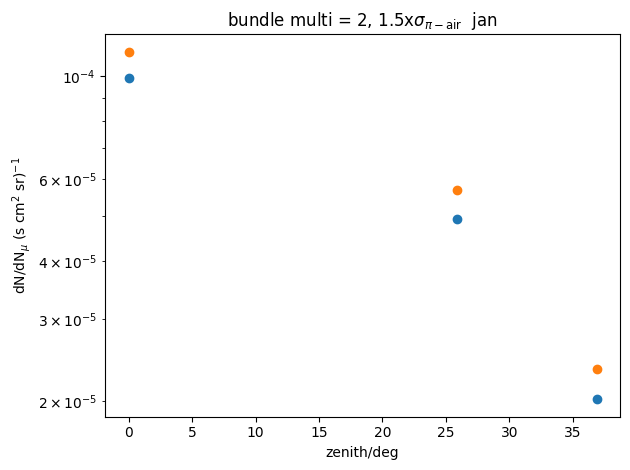

In [176]:
plt.scatter(angles,dN_dNmu[:,1])
plt.scatter(angles,dN_dNmu_mod[:,1])
plt.yscale('log')
plt.xlabel('zenith/deg')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
plt.title('bundle multi = 2, ' + cs+'x$\sigma_{\pi -\mathrm{air}}$  jan')

plt.tight_layout()
plt.savefig(plot_dir + 'multiperbundle2_zenith' + str(d) + 'km_jan_csp' + cs + nucleus+  '.png')

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3569496/2502922951.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.title('bundle multi = 2, ' + cs+'x$\sigma_{\pi -\mathrm{air}}$  jan')


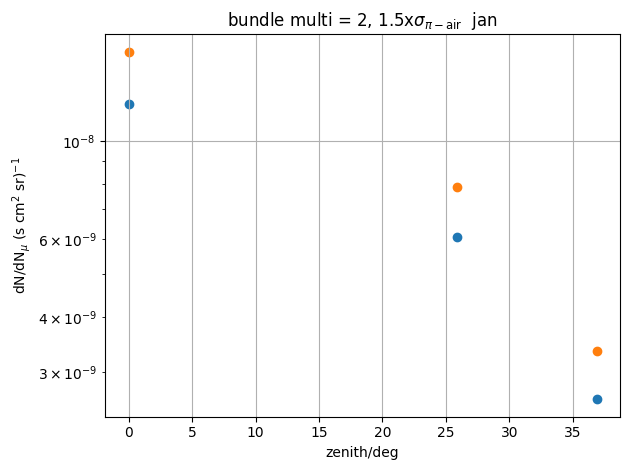

In [177]:
plt.scatter(angles,dN_dNmu[:,19])
plt.scatter(angles,dN_dNmu_mod[:,19])
plt.yscale('log')
plt.xlabel('zenith/deg')
plt.xlabel('zenith/deg')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
plt.title('bundle multi = 2, ' + cs+'x$\sigma_{\pi -\mathrm{air}}$  jan')

plt.grid()
plt.tight_layout()
plt.savefig(plot_dir + 'multiperbundle20_zenith' + str(d) + 'km_jan_csp' + cs + nucleus+  '.png')

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3569496/2434762810.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.title('bundle multi = 2, ' + cs+'x$\sigma_{\pi -\mathrm{air}}$  jan')


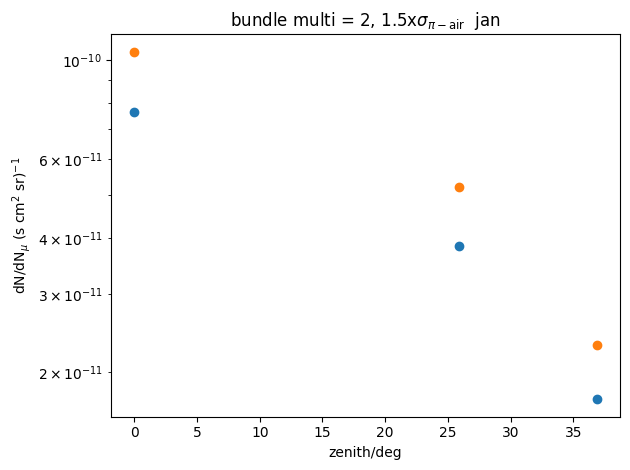

In [178]:
plt.scatter(angles,dN_dNmu[:,79])
plt.scatter(angles,dN_dNmu_mod[:,79])
plt.yscale('log')
plt.xlabel('zenith/deg')
plt.ylabel(r"dN/dN$_\mu$ (s cm$^2$ sr)$^{-1}$")
plt.title('bundle multi = 2, ' + cs+'x$\sigma_{\pi -\mathrm{air}}$  jan')

plt.tight_layout()
plt.savefig(plot_dir + 'multiperbundle80_zenith' + str(d) + 'km_jan_csp' + cs + nucleus+  '.png')